In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

In [ ]:
df = pd.read_excel('premiums_with_life_style.xlsx')
df.head()

,Age,Gender,Region,Marital_status,Physical_Activity,Stress_Level,Number Of Dependants,BMI_Category,Smoking_Status,Employment_Status,Income_Level,Income_Lakhs,Medical History,Insurance_Plan,Annual_Premium_Amount
0,56,Female,Southeast,Unmarried,Medium,Medium,2,Normal,No Smoking,Self-Employed,25L - 40L,37,High blood pressure,Gold,27944
1,38,Female,Northeast,Married,Low,High,5,Overweight,Occasional,Freelancer,10L - 25L,10,No Disease,Silver,21108
2,18,Female,Southwest,Unmarried,Medium,High,0,Normal,No Smoking,Freelancer,<10L,9,No Disease,Bronze,8459
3,55,Male,Northeast,Married,High,Medium,3,Overweight,Occasional,Salaried,<10L,9,Thyroid,Silver,21685
4,22,Male,Southeast,Unmarried,Medium,High,2,Normal,Regular,Self-Employed,10L - 25L,13,High blood pressure & Heart disease,Bronze,15984


In [ ]:
df.shape

(10000, 15)

In [ ]:
df.columns = df.columns.str.replace(' ', '_').str.lower()
df.columns

Index(['age', 'gender', 'region', 'marital_status', 'physical_activity',
       'stress_level', 'number_of_dependants', 'bmi_category',
       'smoking_status', 'employment_status', 'income_level', 'income_lakhs',
       'medical_history', 'insurance_plan', 'annual_premium_amount'],
      dtype='object')

In [ ]:
df.age.unique()

array([  56,   38,   18,   55,   22,   33,   53,   39,   42,   44,   27,
         43,   30,   31,   48,   37,   20,   45,   60,   21,   40,   54,
         23,   29,   58,   49,   26,   28,   52,   25,   46,   50,   19,
         47,   59,   70,   51,   24,   32,  128,   41,   34,   61,   57,
         36, 1178,   68,   64,   66,   72,   35,   71,   67,  567,   62,
        456,   69,   65,   63])

In [ ]:
df.isnull().sum()

,0
age,0
gender,0
region,0
marital_status,0
physical_activity,0
stress_level,0
number_of_dependants,0
bmi_category,0
smoking_status,9
employment_status,7


In [ ]:
null_columns = df.columns[df.isnull().sum() > 0]
null_columns_types = df[null_columns].dtypes

print(null_columns_types)

smoking_status       object
employment_status    object
income_level         object
dtype: object


In [ ]:
df['smoking_status'].fillna(df['smoking_status'].mode()[0], inplace=True)
df['employment_status'].fillna(df['employment_status'].mode()[0], inplace=True)
df['income_level'].fillna(df['income_level'].mode()[0], inplace=True)

In [ ]:
df.isnull().sum()

,0
age,0
gender,0
region,0
marital_status,0
physical_activity,0
stress_level,0
number_of_dependants,0
bmi_category,0
smoking_status,0
employment_status,0


In [ ]:
df.drop_duplicates(inplace = True)
df.duplicated().sum()

0

In [ ]:
df[df.number_of_dependants<0].shape

(0, 15)

In [ ]:
#let us check the unique values for the above cell (where the number_of_dependants are <0)
df[df.number_of_dependants<0].number_of_dependants.unique()

array([], dtype=int64)

In [ ]:
#Converting the above rows that have negative value for number of dependants to positive value
df['number_of_dependants'] = df['number_of_dependants'].apply(lambda x: abs(x))

In [ ]:
df['number_of_dependants'].describe()

,number_of_dependants
count,10000.000000
mean,3.192900
std,21.650454
min,0.000000
25%,0.000000
50%,2.000000
75%,3.000000
max,456.000000


### OUTLIER TREATMENT

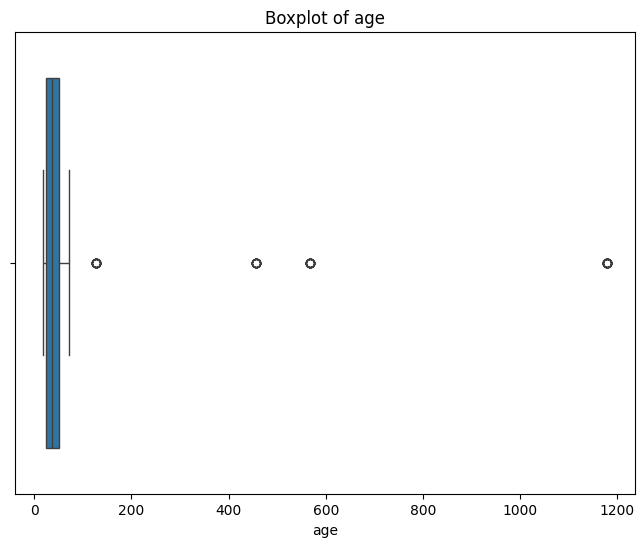

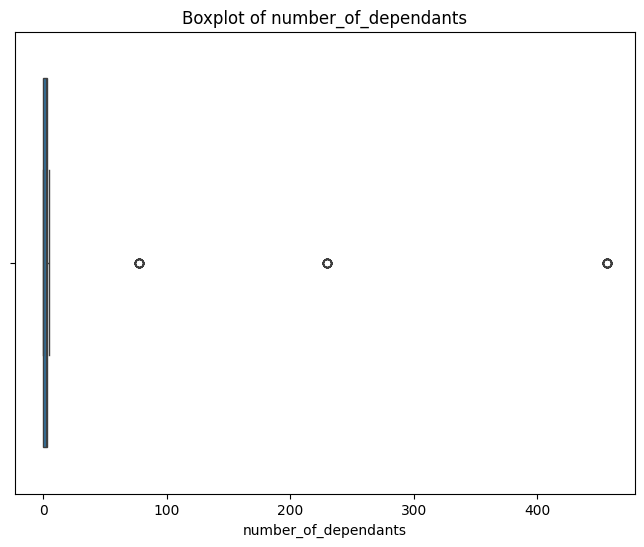

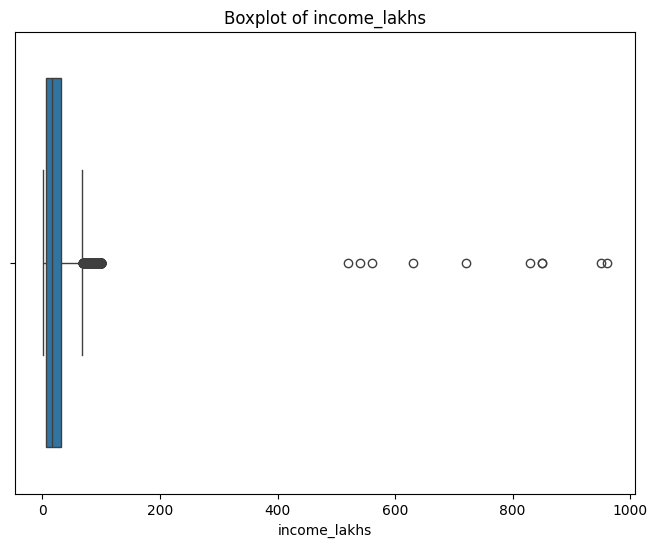

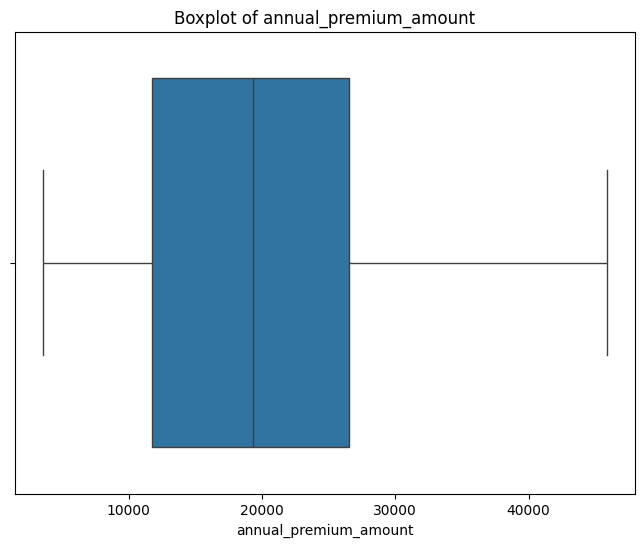

In [ ]:
# Select only numeric columns
numeric_cols = df.select_dtypes(include=np.number).columns

# Create box plots for each numeric column
for col in numeric_cols:
  plt.figure(figsize=(8, 6))
  sns.boxplot(x=df[col])
  plt.title(f'Boxplot of {col}')
  plt.show()


In [ ]:
df = df[df['age'] <= 100]

In [ ]:
df['age'].describe()

,age
count,9942.000000
mean,37.750251
std,13.979445
min,18.000000
25%,24.000000
50%,37.000000
75%,50.000000
max,72.000000


<Axes: xlabel='income_lakhs', ylabel='Count'>

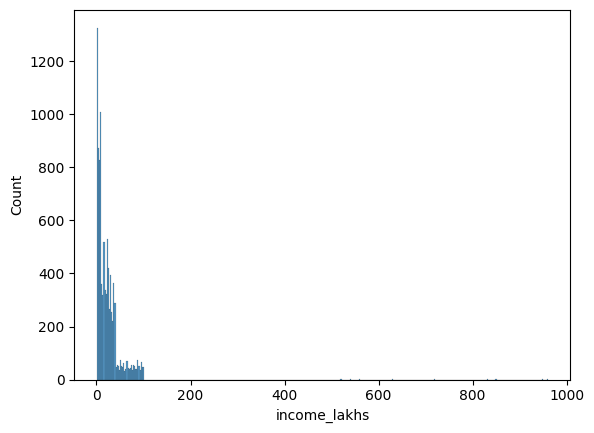

In [ ]:
sns.histplot(df['income_lakhs'])

In [ ]:
#Define a function and call IQR method to get IQR bounds
def iqr_bounds(col):
    Q1, Q3 = col.quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return lower_bound, upper_bound

In [ ]:
iqr_bounds(df['income_lakhs'])

(-31.5, 68.5)

In [ ]:
iqr_bounds(df['number_of_dependants'])

(-4.5, 7.5)

In [ ]:
# Calculate the exact quantile for the value 100.0 in income_lakhs
quantile_value = df['income_lakhs'].rank(pct=True)[df['income_lakhs'] == 100.0].min()

print(f"The quantile value corresponding to an upper bound of 100.0 in income_lakhs is: {quantile_value}")

The quantile value corresponding to an upper bound of 100.0 in income_lakhs is: 0.9975357071011869


In [ ]:
#Calculate the exact quantile for the value 5 in number_of_dependants
quantile_value_1 = df['number_of_dependants'].rank(pct=True)[df['number_of_dependants'] == 5.0].min()

print(f"The quantile value corresponding to an upper bound of 5 in number_of_dependants is: {quantile_value_1}")

The quantile value corresponding to an upper bound of 5 in number_of_dependants is: 0.9746026956346812


In [ ]:
quantile_threshold = df['income_lakhs'].quantile(quantile_value)
quantile_threshold

100.0

In [ ]:
df[df.income_lakhs > quantile_threshold]

,age,gender,region,marital_status,physical_activity,stress_level,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount
361,19,Female,Southeast,Unmarried,Medium,High,1,Underweight,No Smoking,Salaried,> 40L,850,No Disease,Silver,12109
518,47,Male,Southwest,Married,Low,Low,4,Normal,Regular,Self-Employed,> 40L,850,High blood pressure & Heart disease,Gold,36632
1469,32,Male,Southwest,Unmarried,Medium,Medium,1,Underweight,No Smoking,Salaried,> 40L,950,No Disease,Bronze,8992
1576,35,Male,Southwest,Married,Medium,Medium,4,Underweight,Occasional,Salaried,> 40L,830,High blood pressure & Heart disease,Gold,28749
2944,21,Male,Northeast,Unmarried,Medium,Low,1,Underweight,No Smoking,Self-Employed,> 40L,560,No Disease,Silver,10086
3464,21,Female,Southwest,Unmarried,High,High,0,Normal,No Smoking,Self-Employed,> 40L,540,No Disease,Gold,13751
4976,24,Female,Southwest,Unmarried,Medium,High,0,Underweight,No Smoking,Salaried,> 40L,720,No Disease,Silver,11150
5281,18,Female,Southeast,Unmarried,Medium,Medium,0,Normal,Regular,Freelancer,> 40L,520,No Disease,Silver,13204
9021,55,Female,Northeast,Unmarried,Low,Low,0,Overweight,No Smoking,Self-Employed,> 40L,630,Diabetes,Silver,24311
9426,24,Male,Southwest,Unmarried,High,Low,0,Normal,Regular,Self-Employed,> 40L,960,No Disease,Silver,12119


In [ ]:
df[df.income_lakhs > quantile_threshold].shape

(10, 15)

In [ ]:
## Just dropping those 10 records
df = df[df['income_lakhs'] <= quantile_threshold]
df['income_lakhs'].describe()

,income_lakhs
count,9932.000000
mean,22.635622
std,22.439308
min,1.000000
25%,6.000000
50%,16.000000
75%,31.000000
max,100.000000


In [ ]:
quantile_threshold_1 = df['number_of_dependants'].quantile(quantile_value_1)
quantile_threshold_1

5.0

In [ ]:
df[df.number_of_dependants > quantile_threshold_1].shape

(47, 15)

In [ ]:
#Let us handle these outliers by placing the quantile_threshold_1 value in the extreme outliers
df.loc[df.number_of_dependants > quantile_threshold_1, 'number_of_dependants'] = quantile_threshold_1
df[df.number_of_dependants > quantile_threshold_1].shape

(0, 15)

<Axes: xlabel='number_of_dependants', ylabel='Count'>

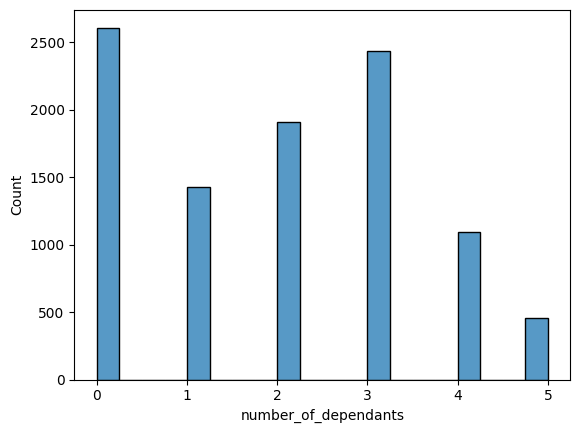

In [ ]:
sns.histplot(df.number_of_dependants,bins=20)

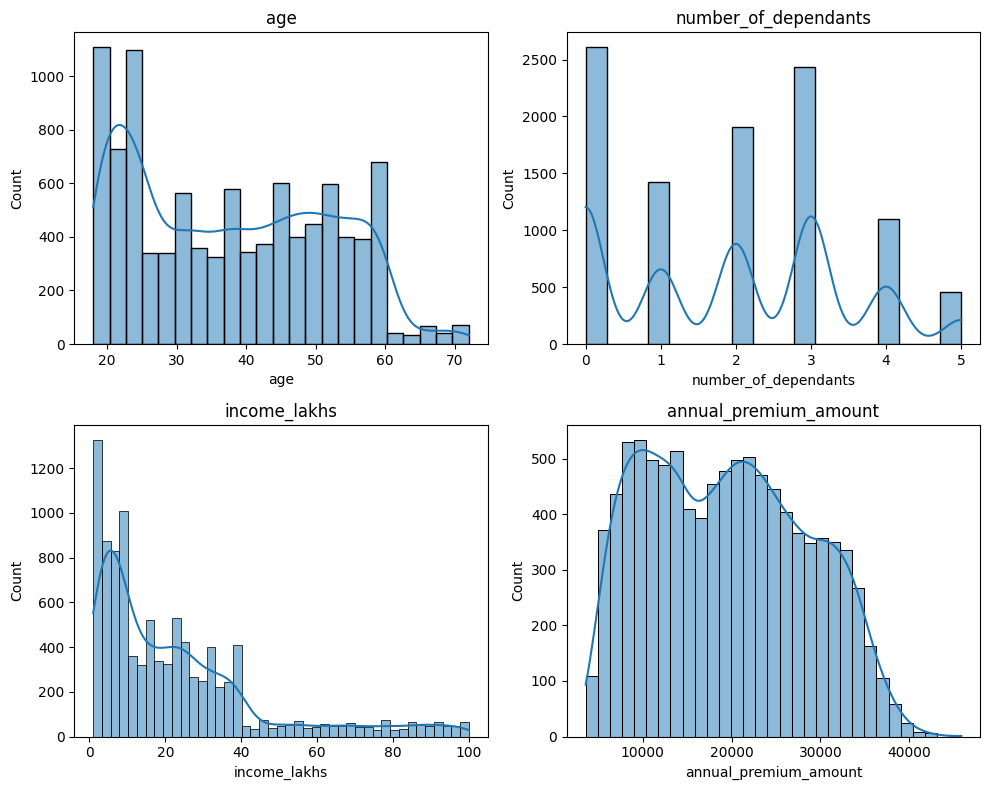

In [ ]:
#hist plot on numeric data
fig, axs = plt.subplots(nrows = 2, ncols = 2, figsize=(10, 8))

for i, col in enumerate(df.select_dtypes(include=np.number).columns):
  sns.histplot(df[col], ax=axs[i//2, i%2], kde = True)
  axs[i//2, i%2].set_title(col)
plt.tight_layout()
plt.show()

### BIVARIATE ANALYSIS: NUMERIC COLUMNS

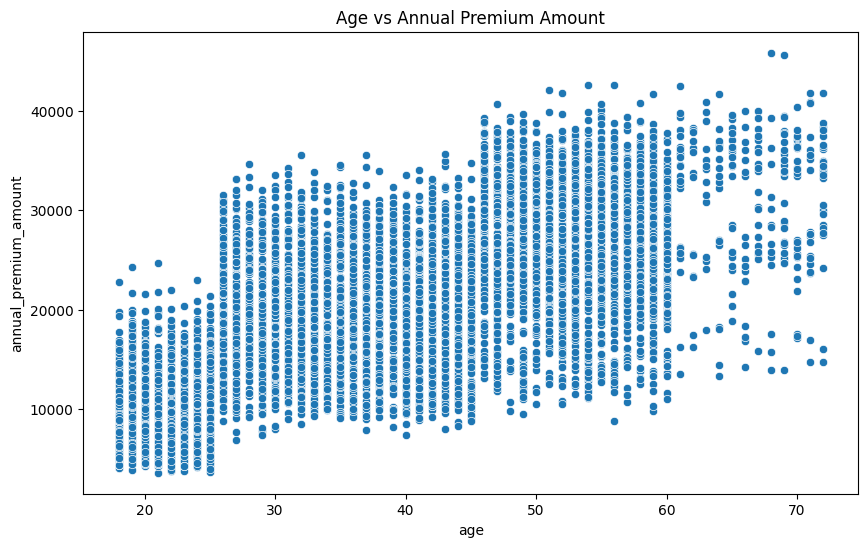

In [ ]:
#Scatterplot to see the relation between age and annual_premium_amount
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='annual_premium_amount', data=df)
plt.title('Age vs Annual Premium Amount')
plt.show()

In [ ]:
#Correlation between age and annual_premium_amount
df[['age', 'annual_premium_amount']].corr()

,age,annual_premium_amount
age,1.000000,0.748855
annual_premium_amount,0.748855,1.000000


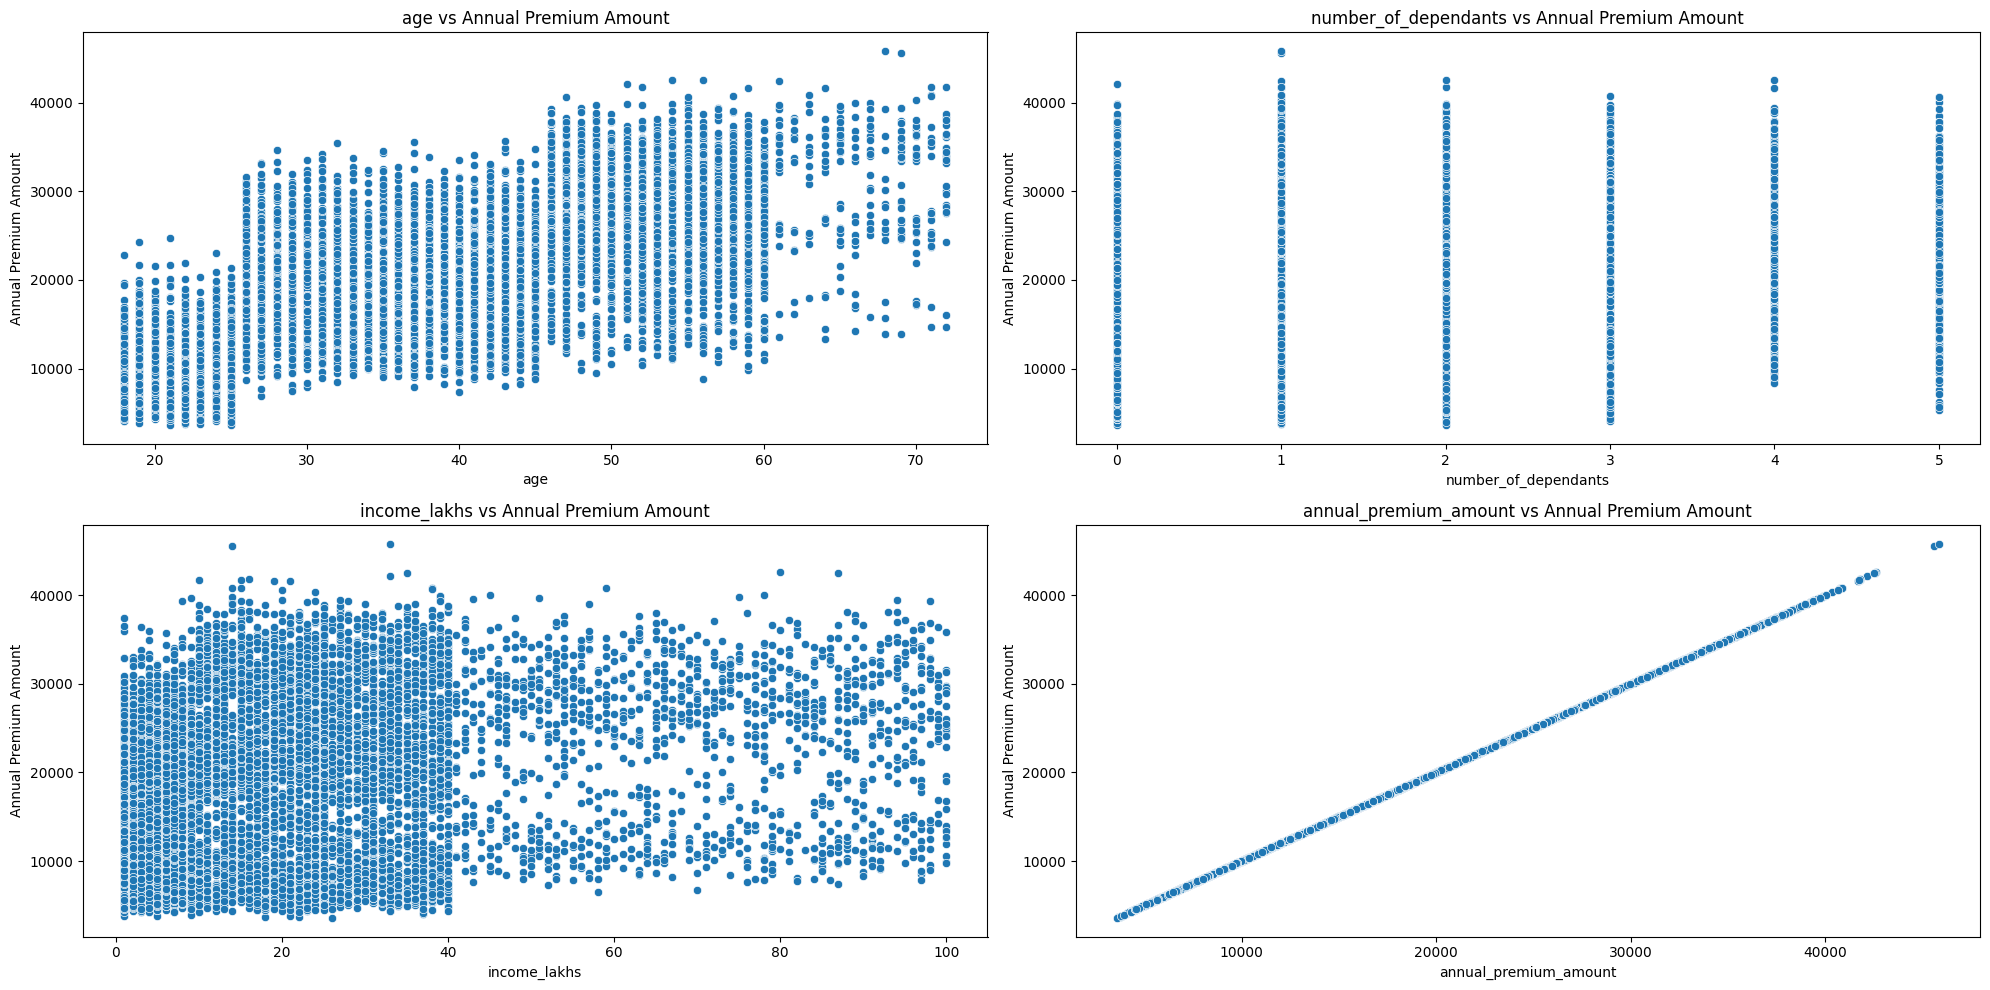

In [ ]:
#For loop for all numeric columns vs annual_premium_amount scatter plot with subplots

# Number of columns per row
n_cols = 2
# Calculate the number of rows needed
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols

# Create subplots with the calculated number of rows and columns
fig, axs = plt.subplots(n_rows, n_cols, figsize=(20, 5 * n_rows))

# Flatten the 1D array of axes if there are more than one row
if n_rows > 1:
  axs = axs.flatten()

# Loop through each column in the DataFrame

for ax, col in zip(axs, numeric_cols):
  sns.scatterplot(x=col, y='annual_premium_amount', data=df, ax=ax)
  ax.set_title(f'{col} vs Annual Premium Amount')
  ax.set_xlabel(col)
  ax.set_ylabel('Annual Premium Amount')

# Remove any empty subplots if there are fewer columns than rows
for ax in axs[len(numeric_cols):]:
  fig.delaxes(ax)

plt.tight_layout()
plt.show()

In [ ]:
#Get categorical columns and print unique values in each of those columns
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
  print(f"{col}: {df[col].unique()}")

gender: ['Female' 'Male']
region: ['Southeast' 'Northeast' 'Southwest' 'Northwest']
marital_status: ['Unmarried' 'Married']
physical_activity: ['Medium' 'Low' 'High']
stress_level: ['Medium' 'High' 'Low']
bmi_category: ['Normal' 'Overweight' 'Obesity' 'Underweight']
smoking_status: ['No Smoking' 'Occasional' 'Regular']
employment_status: ['Self-Employed' 'Freelancer' 'Salaried']
income_level: ['25L - 40L' '10L - 25L' '<10L' '> 40L']
medical_history: ['High blood pressure' 'No Disease' 'Thyroid'
 'High blood pressure & Heart disease' 'Diabetes & Thyroid' 'Diabetes'
 'Heart disease' 'Diabetes & High blood pressure'
 'Diabetes & Heart disease']
insurance_plan: ['Gold' 'Silver' 'Bronze']


In [ ]:
df['gender'].value_counts(normalize = True)

,proportion
gender,
Female,0.598671
Male,0.401329


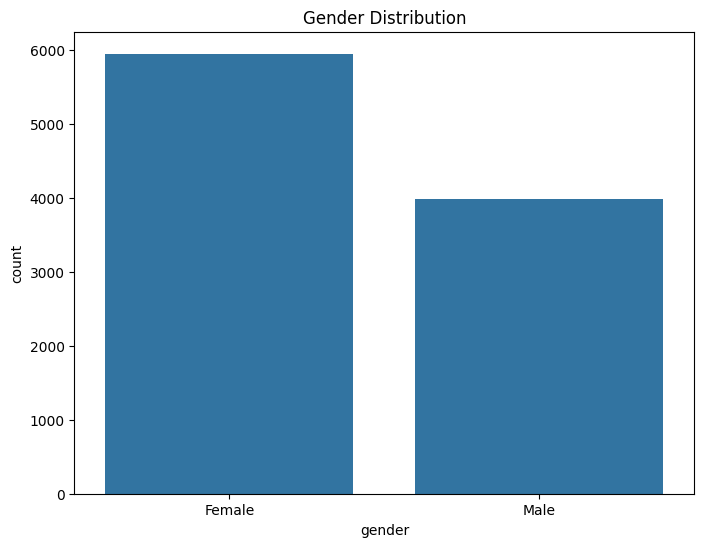

In [ ]:
#Plot bar chart for gender
plt.figure(figsize=(8, 6))
sns.countplot(x='gender', data=df)
plt.title('Gender Distribution')
plt.show()

### UNIVARIATE ANALYSIS

<ipython-input-48-66d6ba6c80f4>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=45, ha='right')
<ipython-input-48-66d6ba6c80f4>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=45, ha='right')
<ipython-input-48-66d6ba6c80f4>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=45, ha='right')
<ipython-input-48-66d6ba6c80f4>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=45, ha='right')
<ipython-input-48-66d6ba6c80f4>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=45, ha='right')
<ipython-input-48-66d6ba6c80f4>:9: UserWarning: FixedFormatter should 

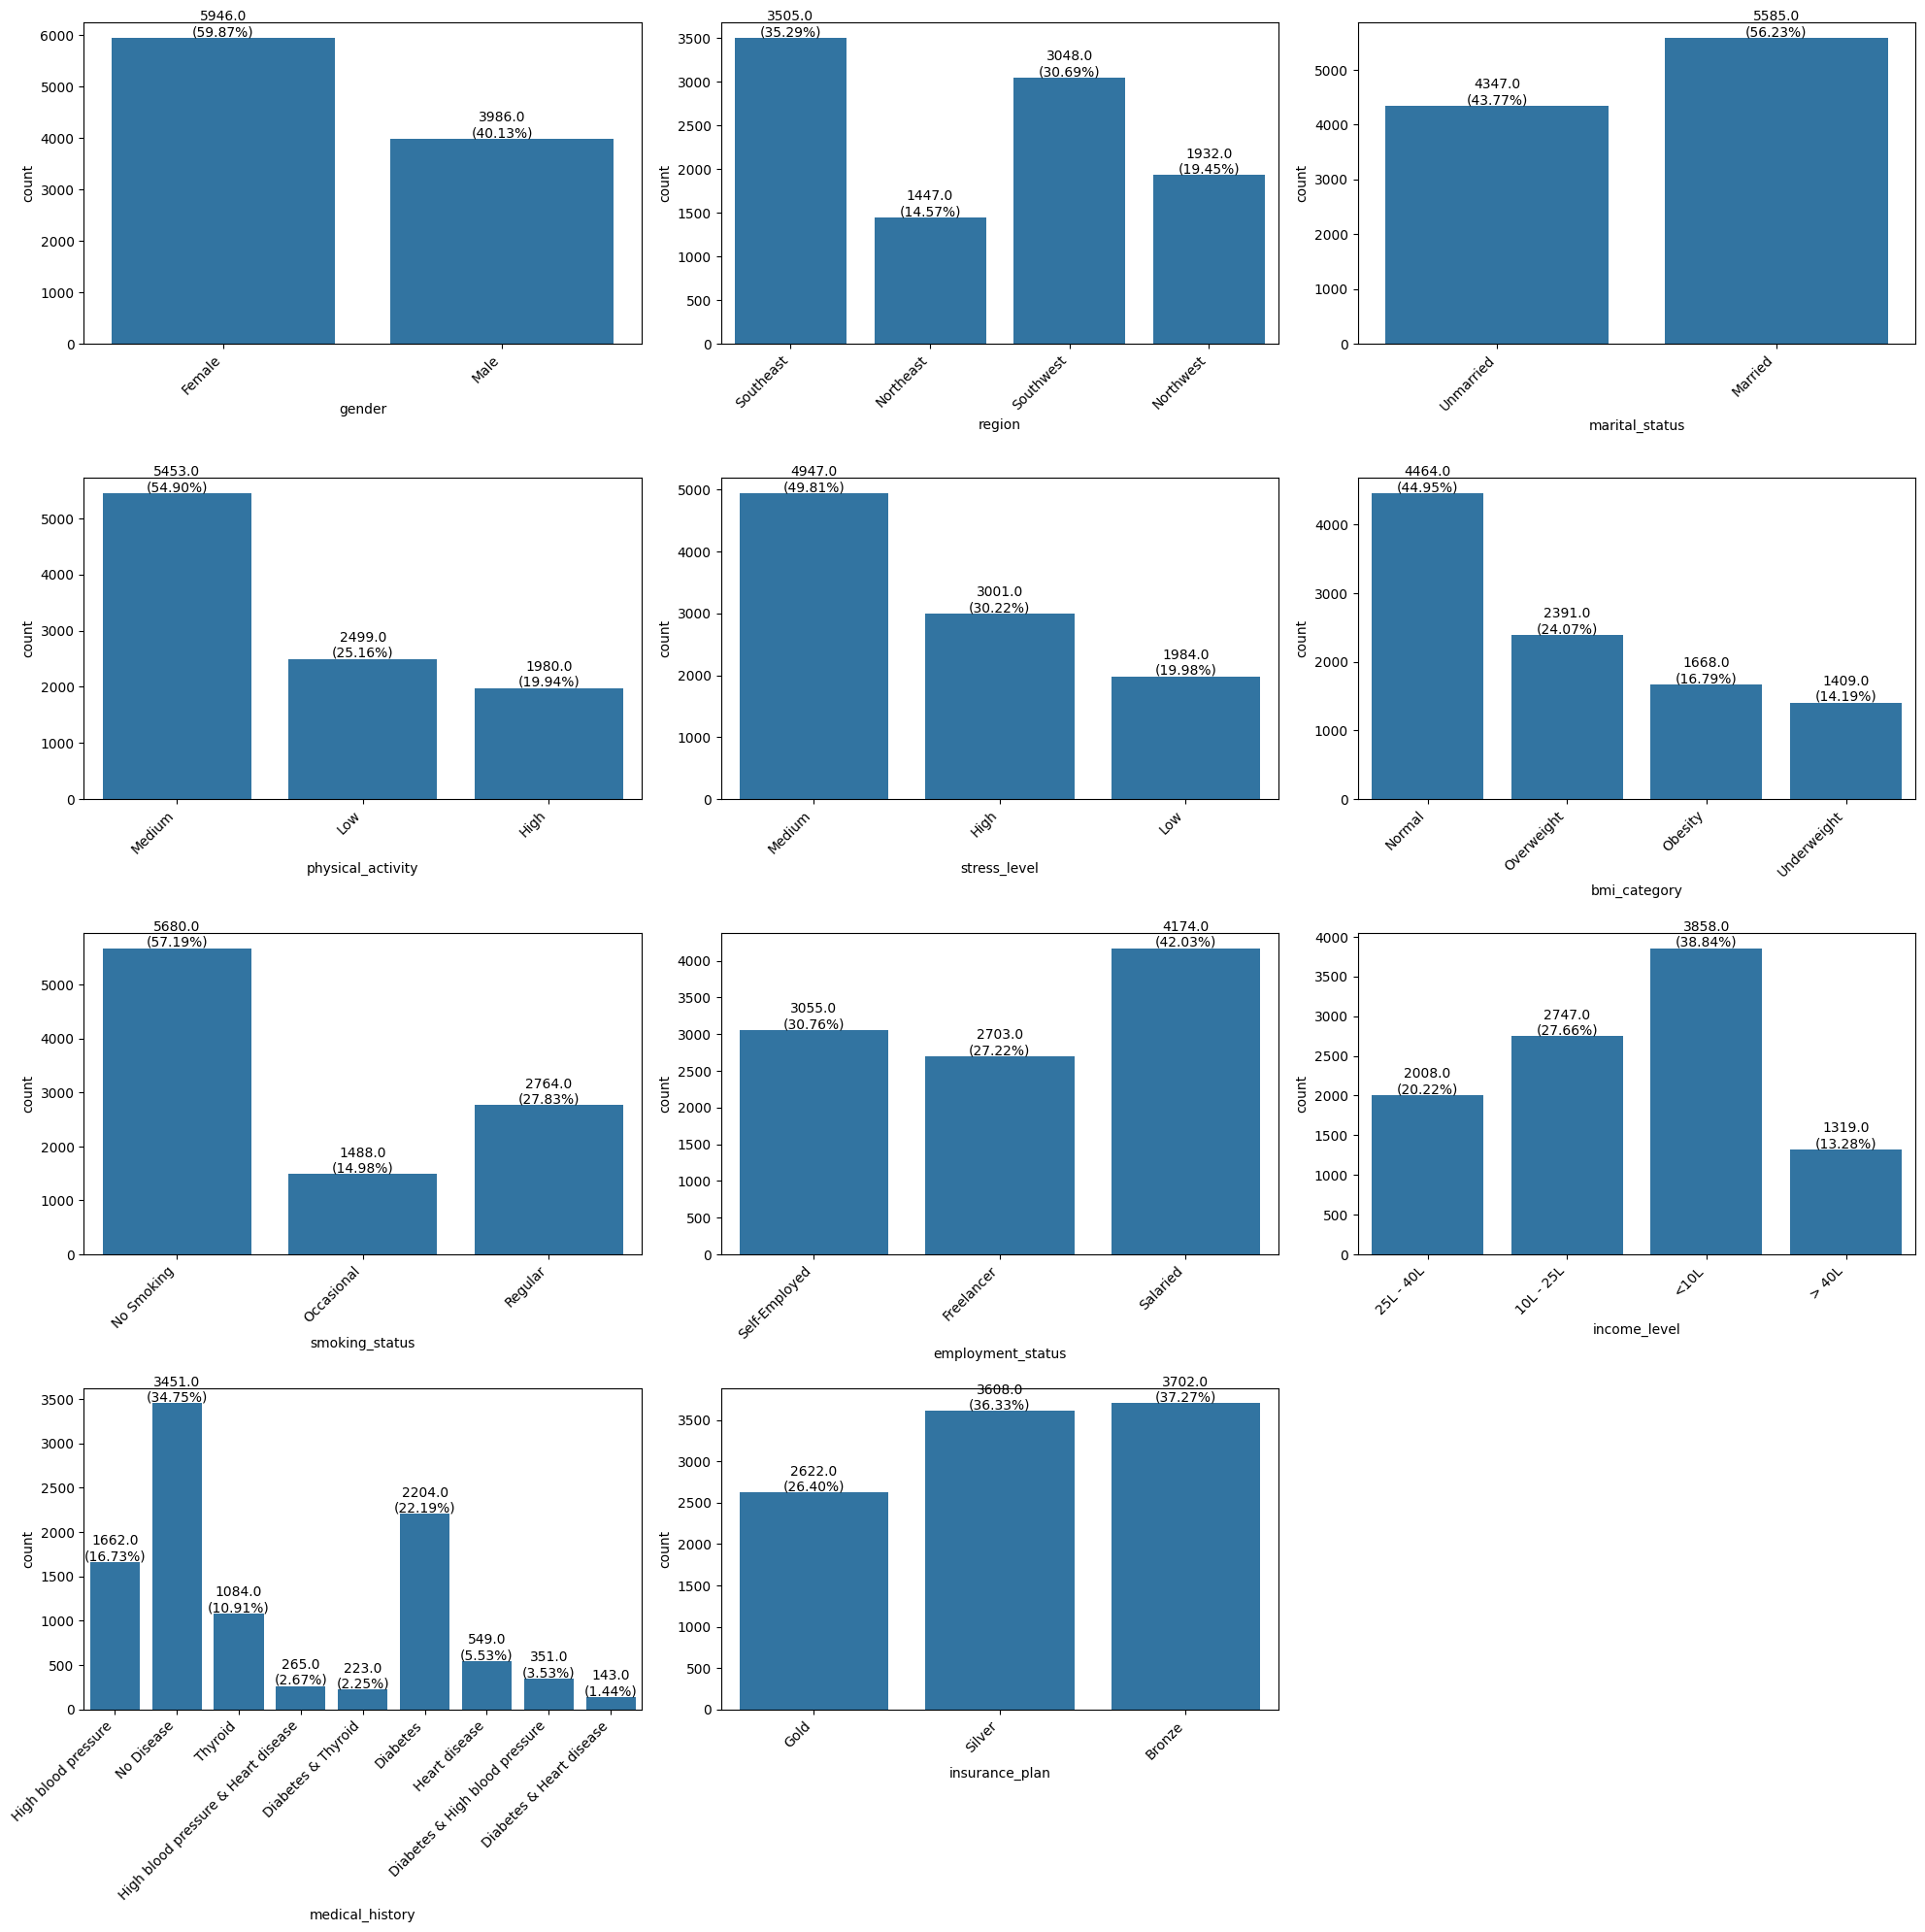

In [ ]:
fig, axs = plt.subplots(4, 3, figsize=(20, 20))
axs = axs.flatten()

# Rotate labels and plot bar chart with count and percentages in it
for i, col in enumerate(categorical_cols):
  counts = df[col].value_counts()
  percentages = counts / counts.sum()
  sns.countplot(x=col, data=df, ax=axs[i])
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=45, ha='right')
  for p in axs[i].patches:
    axs[i].annotate(f'{p.get_height()}\n({100*p.get_height()/len(df):.2f}%)',
     (p.get_x()+p.get_width()/2., p.get_height()), ha='center',
                    va='center', xytext=(0, 10), textcoords='offset points')

  #Delete the unsused subplot
  if i >= len(categorical_cols) - 1:
    fig.delaxes(axs[i+1])

plt.tight_layout()
plt.show()

# for i, col in enumerate(categorical_cols):
#   sns.countplot(x=col, data=df, ax=axs[i])
#   axs[i].set_title(f'Distribution of {col}')
#   axs[i].set_xlabel(col)
#   axs[i].set_ylabel('Count')

# plt.tight_layout()
# plt.show()


### BIVARIATE ANALYSIS

Text(0.5, 1.0, 'Distribution of Insurance Plans by Income Level')

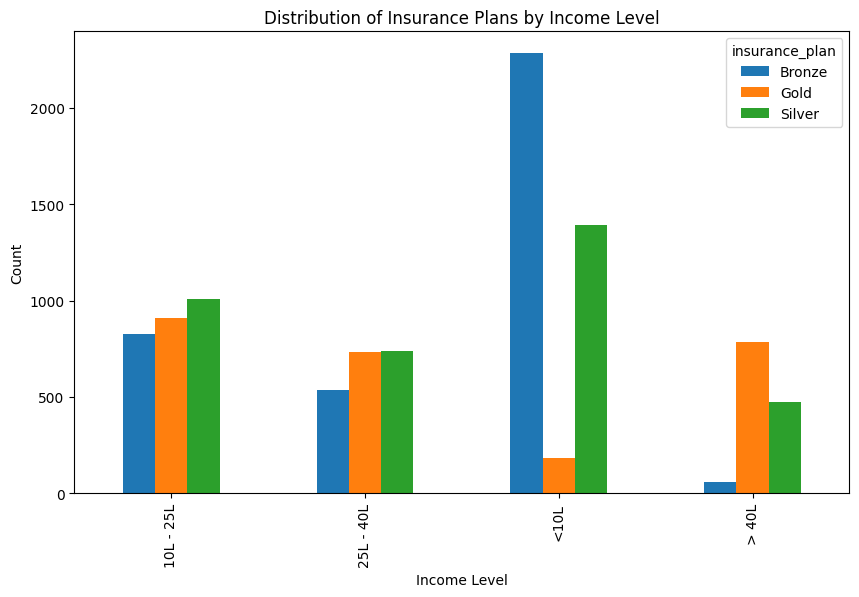

In [ ]:
#Based on income_level, what kind of insurance plan people are getting
df.groupby('income_level')['insurance_plan'].value_counts(normalize = True)
crosstab = pd.crosstab(df['income_level'], df['insurance_plan'])


crosstab.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Income Level')
plt.ylabel('Count')
plt.title('Distribution of Insurance Plans by Income Level')

<Axes: xlabel='insurance_plan', ylabel='income_level'>

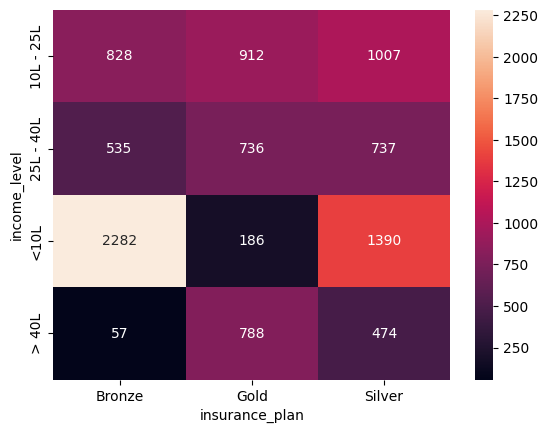

In [ ]:
sns.heatmap(crosstab, annot=True,  fmt='g')

### FEATURE ENGINEERING

#### MEDICAL HISTORY

In [ ]:
df.medical_history.unique()

array(['High blood pressure', 'No Disease', 'Thyroid',
       'High blood pressure & Heart disease', 'Diabetes & Thyroid',
       'Diabetes', 'Heart disease', 'Diabetes & High blood pressure',
       'Diabetes & Heart disease'], dtype=object)

In [ ]:
df['medical_history'].str.split(' & ', expand=True).apply(lambda x: x.str.lower())

,0,1
0,high blood pressure,None
1,no disease,None
2,no disease,None
3,thyroid,None
4,high blood pressure,heart disease
...,...,...
9995,diabetes,None
9996,high blood pressure,None
9997,no disease,None
9998,diabetes,None


In [ ]:
df[['disease 1', 'disease 2']] = df['medical_history'].str.split(' & ', expand=True).apply(lambda x: x.str.lower())
df.sample(10)

,age,gender,region,marital_status,physical_activity,stress_level,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,disease 1,disease 2
2838,59,Male,Southeast,Unmarried,Medium,High,1,Overweight,No Smoking,Self-Employed,<10L,8,High blood pressure,Silver,24542,high blood pressure,None
6709,39,Female,Northwest,Married,High,Medium,3,Obesity,No Smoking,Salaried,<10L,5,No Disease,Bronze,12207,no disease,None
9506,42,Female,Southwest,Unmarried,Medium,Medium,1,Normal,No Smoking,Freelancer,10L - 25L,14,Thyroid,Silver,16965,thyroid,None
7587,19,Female,Southeast,Unmarried,High,Low,0,Obesity,No Smoking,Salaried,<10L,6,No Disease,Bronze,9083,no disease,None
4539,58,Male,Southeast,Unmarried,Medium,Medium,2,Overweight,Regular,Self-Employed,<10L,1,Heart disease,Gold,37440,heart disease,None
5471,50,Female,Northwest,Married,Low,High,5,Normal,No Smoking,Self-Employed,10L - 25L,18,Diabetes,Gold,32394,diabetes,None
8995,55,Male,Southwest,Married,Medium,High,3,Obesity,Regular,Self-Employed,25L - 40L,28,Diabetes,Gold,37167,diabetes,None
4546,45,Female,Southeast,Unmarried,Medium,Medium,0,Obesity,No Smoking,Salaried,10L - 25L,25,Diabetes,Silver,20337,diabetes,None
3029,22,Female,Northwest,Unmarried,Medium,Medium,0,Normal,No Smoking,Freelancer,25L - 40L,27,No Disease,Bronze,4822,no disease,None
642,19,Male,Northeast,Unmarried,Medium,Medium,1,Normal,No Smoking,Freelancer,<10L,2,No Disease,Bronze,4993,no disease,None


In [ ]:
risk_scores = {
    "diabetes":6,
    "heart disease":8,
    "high blood pressure":6,
    "thyroid":5,
    "no disease":0,
    "none":0
}

df['disease 1'].fillna('none', inplace=True)
df['disease 2'].fillna('none', inplace=True)

df['total_risk_score'] = df['disease 1'].map(risk_scores) + df['disease 2'].map(risk_scores)

#Normalize the total_risk_score column
df['normalized_risk_score'] = (df['total_risk_score'] - df['total_risk_score'].min()) / (df['total_risk_score'].max() - df['total_risk_score'].min())
df.head()

,age,gender,region,marital_status,physical_activity,stress_level,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,disease 1,disease 2,total_risk_score,normalized_risk_score
0,56,Female,Southeast,Unmarried,Medium,Medium,2,Normal,No Smoking,Self-Employed,25L - 40L,37,High blood pressure,Gold,27944,high blood pressure,none,6,0.428571
1,38,Female,Northeast,Married,Low,High,5,Overweight,Occasional,Freelancer,10L - 25L,10,No Disease,Silver,21108,no disease,none,0,0.000000
2,18,Female,Southwest,Unmarried,Medium,High,0,Normal,No Smoking,Freelancer,<10L,9,No Disease,Bronze,8459,no disease,none,0,0.000000
3,55,Male,Northeast,Married,High,Medium,3,Overweight,Occasional,Salaried,<10L,9,Thyroid,Silver,21685,thyroid,none,5,0.357143
4,22,Male,Southeast,Unmarried,Medium,High,2,Normal,Regular,Self-Employed,10L - 25L,13,High blood pressure & Heart disease,Bronze,15984,high blood pressure,heart disease,14,1.000000


#### LIFESTYLE RISK

In [ ]:
df.physical_activity.unique()

array(['Medium', 'Low', 'High'], dtype=object)

In [ ]:
df.stress_level.unique()

array(['Medium', 'High', 'Low'], dtype=object)

In [ ]:
#Calculate risk scores
def calculate_lifestyle_risk_score(row):
  physical_activity_risk_score = {
      'High': 0,
      'Medium': 1,
      'Low': 2
  }

  stress_level_risk_score = {
      'High': 2,
      'Medium': 1,
      'Low': 0
  }

  life_style_risk =  physical_activity_risk_score[row['physical_activity']] + stress_level_risk_score[row['stress_level']]
  return life_style_risk

df['lifestyle_risk_score'] = df.apply(calculate_lifestyle_risk_score, axis=1)
df.head()

,age,gender,region,marital_status,physical_activity,stress_level,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,disease 1,disease 2,total_risk_score,normalized_risk_score,lifestyle_risk_score
0,56,Female,Southeast,Unmarried,Medium,Medium,2,Normal,No Smoking,Self-Employed,25L - 40L,37,High blood pressure,Gold,27944,high blood pressure,none,6,0.428571,2
1,38,Female,Northeast,Married,Low,High,5,Overweight,Occasional,Freelancer,10L - 25L,10,No Disease,Silver,21108,no disease,none,0,0.000000,4
2,18,Female,Southwest,Unmarried,Medium,High,0,Normal,No Smoking,Freelancer,<10L,9,No Disease,Bronze,8459,no disease,none,0,0.000000,3
3,55,Male,Northeast,Married,High,Medium,3,Overweight,Occasional,Salaried,<10L,9,Thyroid,Silver,21685,thyroid,none,5,0.357143,1
4,22,Male,Southeast,Unmarried,Medium,High,2,Normal,Regular,Self-Employed,10L - 25L,13,High blood pressure & Heart disease,Bronze,15984,high blood pressure,heart disease,14,1.000000,3


<Axes: xlabel='lifestyle_risk_score', ylabel='Count'>

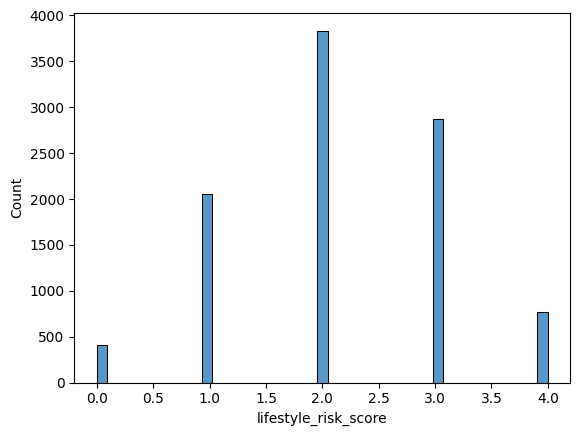

In [ ]:
sns.histplot(df['lifestyle_risk_score'])

### ENCODE TEXT COLUMNS

In [ ]:
df.insurance_plan.unique()

array(['Gold', 'Silver', 'Bronze'], dtype=object)

In [ ]:
df['insurance_plan'] = df['insurance_plan'].map({'Bronze': 1, 'Silver': 2, 'Gold': 3})
df['income_level'] = df['income_level'].map({'<10L': 1, '10L - 25L' : 2, '25L - 40L' : 3, '> 40L' : 4})
df.head()

,age,gender,region,marital_status,physical_activity,stress_level,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,disease 1,disease 2,total_risk_score,normalized_risk_score,lifestyle_risk_score
0,56,Female,Southeast,Unmarried,Medium,Medium,2,Normal,No Smoking,Self-Employed,3,37,High blood pressure,3,27944,high blood pressure,none,6,0.428571,2
1,38,Female,Northeast,Married,Low,High,5,Overweight,Occasional,Freelancer,2,10,No Disease,2,21108,no disease,none,0,0.000000,4
2,18,Female,Southwest,Unmarried,Medium,High,0,Normal,No Smoking,Freelancer,1,9,No Disease,1,8459,no disease,none,0,0.000000,3
3,55,Male,Northeast,Married,High,Medium,3,Overweight,Occasional,Salaried,1,9,Thyroid,2,21685,thyroid,none,5,0.357143,1
4,22,Male,Southeast,Unmarried,Medium,High,2,Normal,Regular,Self-Employed,2,13,High blood pressure & Heart disease,1,15984,high blood pressure,heart disease,14,1.000000,3


In [ ]:
nominal_cols = ['gender', 'region', 'marital_status', 'bmi_category', 'smoking_status', 'employment_status']
df1 = pd.get_dummies(df, columns = nominal_cols, drop_first=True, dtype=int)
df1.head()

,age,physical_activity,stress_level,number_of_dependants,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,disease 1,...,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,56,Medium,Medium,2,3,37,High blood pressure,3,27944,high blood pressure,...,1,0,1,0,0,0,0,0,0,1
1,38,Low,High,5,2,10,No Disease,2,21108,no disease,...,0,0,0,0,1,0,1,0,0,0
2,18,Medium,High,0,1,9,No Disease,1,8459,no disease,...,0,1,1,0,0,0,0,0,0,0
3,55,High,Medium,3,1,9,Thyroid,2,21685,thyroid,...,0,0,0,0,1,0,1,0,1,0
4,22,Medium,High,2,2,13,High blood pressure & Heart disease,1,15984,high blood pressure,...,1,0,1,0,0,0,0,1,0,1


### FEATURE SELECTION

In [ ]:
df1.drop(['medical_history', 'disease 1', 'disease 2','total_risk_score','physical_activity','stress_level'], axis=1, inplace=True)
df1.head()

,age,physical_activity,stress_level,number_of_dependants,income_level,income_lakhs,insurance_plan,annual_premium_amount,normalized_risk_score,lifestyle_risk_score,...,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,56,Medium,Medium,2,3,37,3,27944,0.428571,2,...,1,0,1,0,0,0,0,0,0,1
1,38,Low,High,5,2,10,2,21108,0.000000,4,...,0,0,0,0,1,0,1,0,0,0
2,18,Medium,High,0,1,9,1,8459,0.000000,3,...,0,1,1,0,0,0,0,0,0,0
3,55,High,Medium,3,1,9,2,21685,0.357143,1,...,0,0,0,0,1,0,1,0,1,0
4,22,Medium,High,2,2,13,1,15984,1.000000,3,...,1,0,1,0,0,0,0,1,0,1


In [ ]:
df1.drop(['physical_activity','stress_level'], axis=1, inplace=True)
df1.head()

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,annual_premium_amount,normalized_risk_score,lifestyle_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,56,2,3,37,3,27944,0.428571,2,0,0,1,0,1,0,0,0,0,0,0,1
1,38,5,2,10,2,21108,0.000000,4,0,0,0,0,0,0,1,0,1,0,0,0
2,18,0,1,9,1,8459,0.000000,3,0,0,0,1,1,0,0,0,0,0,0,0
3,55,3,1,9,2,21685,0.357143,1,1,0,0,0,0,0,1,0,1,0,1,0
4,22,2,2,13,1,15984,1.000000,3,1,0,1,0,1,0,0,0,0,1,0,1


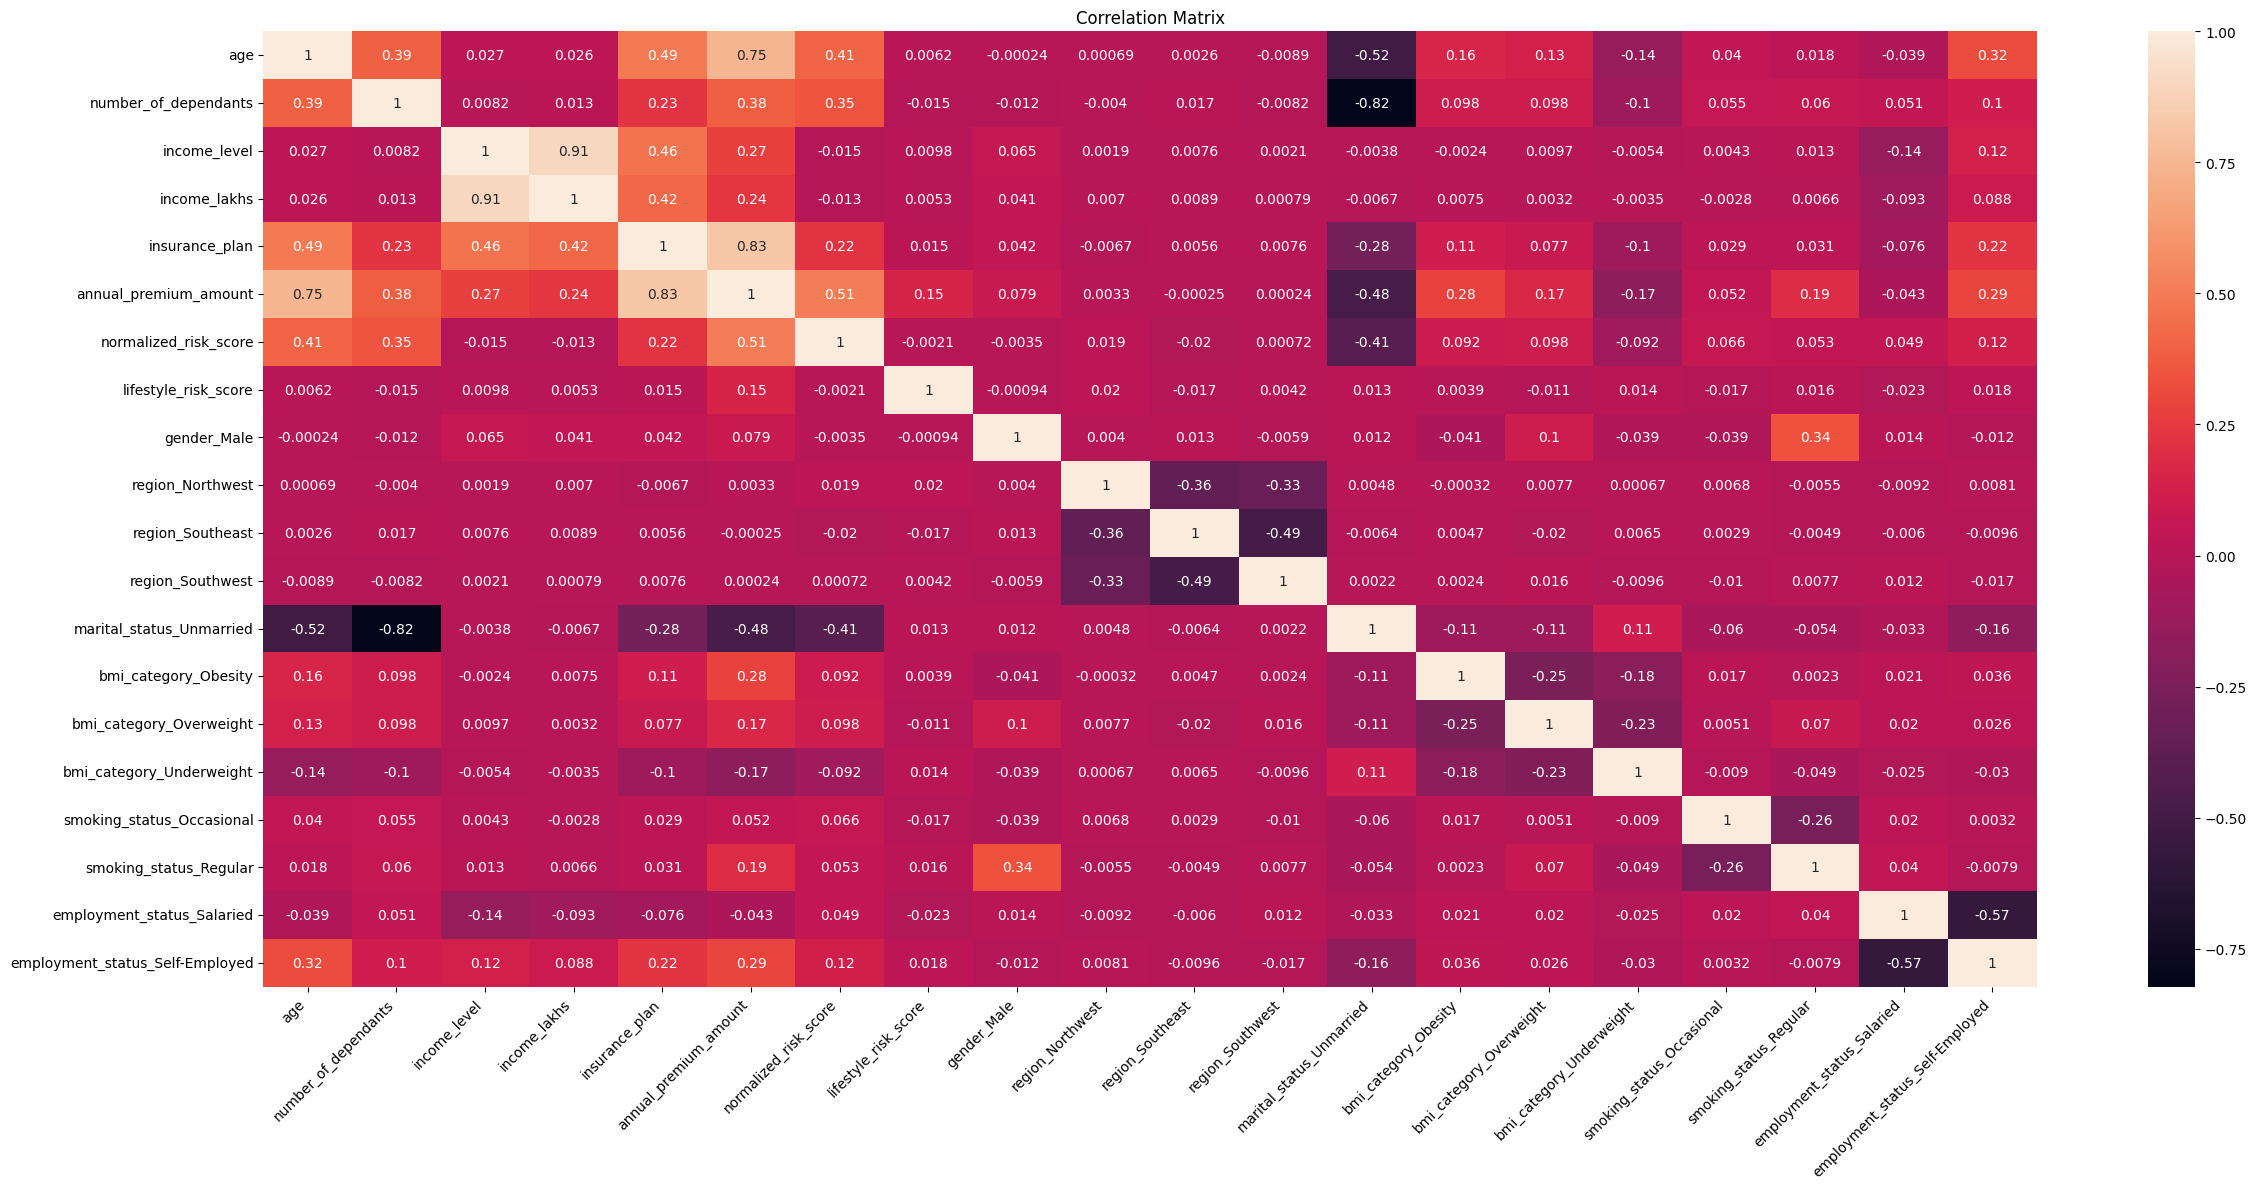

In [ ]:
corr = df1.corr()

plt.figure(figsize=(25, 12))
sns.heatmap(corr, annot=True)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

### CALCULATE VIF SCORE

In [ ]:
X = df1.drop('annual_premium_amount', axis=1)
y = df1['annual_premium_amount']

#Scaling the features
from sklearn.preprocessing import MinMaxScaler, StandardScaler
cols_to_scale = ['age','number_of_dependants', 'income_level',  'income_lakhs', 'insurance_plan', 'lifestyle_risk_score']
scaler = MinMaxScaler()

# Scale the selected columns and update the DataFrame
X[cols_to_scale] = scaler.fit_transform(X[cols_to_scale]) # Use cols_to_scale to select the columns to scale
X.head()

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,normalized_risk_score,lifestyle_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,0.703704,0.4,0.666667,0.363636,1.0,0.428571,0.50,0,0,1,0,1,0,0,0,0,0,0,1
1,0.370370,1.0,0.333333,0.090909,0.5,0.000000,1.00,0,0,0,0,0,0,1,0,1,0,0,0
2,0.000000,0.0,0.000000,0.080808,0.0,0.000000,0.75,0,0,0,1,1,0,0,0,0,0,0,0
3,0.685185,0.6,0.000000,0.080808,0.5,0.357143,0.25,1,0,0,0,0,0,1,0,1,0,1,0
4,0.074074,0.4,0.333333,0.121212,0.0,1.000000,0.75,1,0,1,0,1,0,0,0,0,1,0,1


In [ ]:
def calculate_vif(data):
    vif_df = pd.DataFrame()
    vif_df['Column'] = data.columns
    vif_df['VIF'] = [variance_inflation_factor(data.values,i) for i in range(data.shape[1])]
    return vif_df

In [ ]:
calculate_vif(X)

,Column,VIF
0,age,5.550465
1,number_of_dependants,5.352790
2,income_level,12.518396
3,income_lakhs,10.934583
4,insurance_plan,4.134602
5,normalized_risk_score,3.002245
6,lifestyle_risk_score,5.150109
7,gender_Male,1.910968
8,region_Northwest,2.103157
9,region_Southeast,2.978709


In [ ]:
#Let us drop the column income_level (since it has highest VIF) and calculate VIF again
calculate_vif(X.drop('income_level', axis="columns"))

,Column,VIF
0,age,5.496378
1,number_of_dependants,5.343193
2,income_lakhs,2.445525
3,insurance_plan,3.867173
4,normalized_risk_score,3.002223
5,lifestyle_risk_score,5.144826
6,gender_Male,1.902779
7,region_Northwest,2.103030
8,region_Southeast,2.978037
9,region_Southwest,2.710021


In [ ]:
# we will drop income_lakhs due to high VIF value
X_reduced = X.drop('income_level', axis="columns")

### Model Training

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.30, random_state=10)

In [ ]:
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
test_score = model_lr.score(X_test, y_test)
train_score = model_lr.score(X_train, y_train)
train_score, test_score

(0.9547231765755052, 0.9585636847818437)

In [ ]:
y_pred = model_lr.predict(X_test)

mse_lr = mean_squared_error(y_test, y_pred)
rmse_lr = np.sqrt(mse_lr)
print("Linear Regression ==> MSE: ", mse_lr, "RMSE: ", rmse_lr)

Linear Regression ==> MSE:  3315067.396616683 RMSE:  1820.7326538008492


In [ ]:
X_test.shape

(2980, 18)

In [ ]:
model_lr.coef_

array([ 1.04710597e+04, -6.06185390e+02, -7.96268486e+02,  1.34254801e+04,
        6.44702748e+03,  4.96441428e+03,  2.37875470e+01, -6.60969833e+01,
        6.16391898e+00, -6.75969673e+01, -8.45232013e+02,  4.15602768e+03,
        2.10457400e+03,  4.29087427e+02,  1.17890593e+03,  3.06252419e+03,
        9.43391499e+01,  4.68505402e+02])

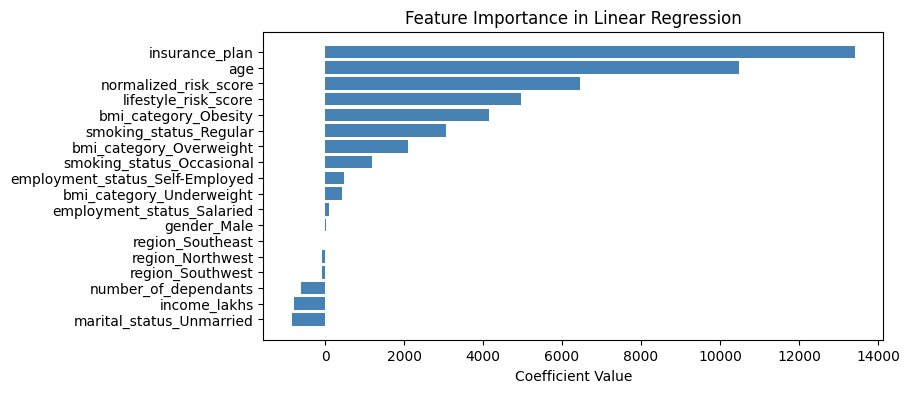

In [ ]:
feature_importance = model_lr.coef_

# Create a DataFrame for easier handling
coef_df = pd.DataFrame(feature_importance, index=X_train.columns, columns=['Coefficients'])

# Sort the coefficients for better visualization
coef_df = coef_df.sort_values(by='Coefficients', ascending=True)

# Plotting
plt.figure(figsize=(8, 4))
plt.barh(coef_df.index, coef_df['Coefficients'], color='steelblue')
plt.xlabel('Coefficient Value')
plt.title('Feature Importance in Linear Regression')
plt.show()

In [ ]:
from xgboost import XGBRegressor

model_xgb = XGBRegressor(n_estimators=20, max_depth=3)
model_xgb.fit(X_train, y_train)
model_xgb.score(X_test, y_test)

0.9887304498797465

In [ ]:
y_pred = model_xgb.predict(X_test)

mse_lr = mean_squared_error(y_test, y_pred)
rmse_lr = np.sqrt(mse_lr)
print("XGBoost Regression ==> MSE: ", mse_lr, "RMSE: ", rmse_lr)

XGBoost Regression ==> MSE:  901608.1179395055 RMSE:  949.5304723596319


In [ ]:
model_xgb = XGBRegressor()
param_grid = {
    'n_estimators': [20, 40, 50],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
}
random_search = RandomizedSearchCV(model_xgb, param_grid, n_iter=10, cv=3, scoring='r2', random_state=42, n_jobs=-1)
random_search.fit(X_train, y_train)
random_search.best_score_

0.9910278772965063

In [ ]:
random_search.best_params_

{'n_estimators': 50, 'max_depth': 5, 'learning_rate': 0.1}

In [ ]:
best_model = random_search.best_estimator_

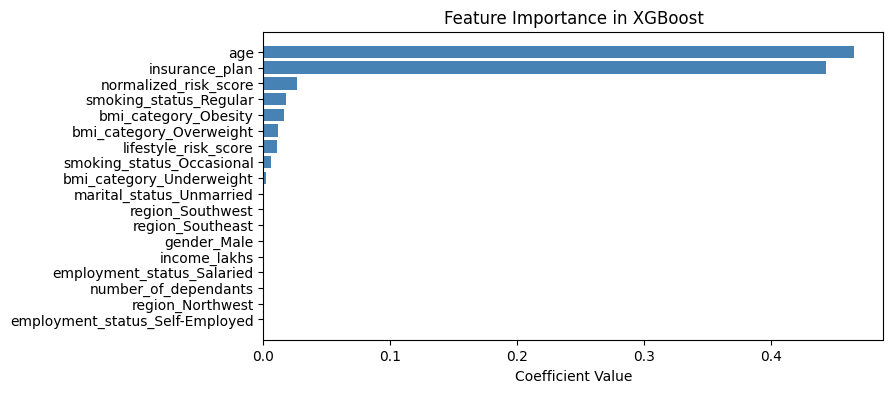

In [ ]:
feature_importance = best_model.feature_importances_

# Create a DataFrame for easier handling
coef_df = pd.DataFrame(feature_importance, index=X_train.columns, columns=['Coefficients'])

# Sort the coefficients for better visualization
coef_df = coef_df.sort_values(by='Coefficients', ascending=True)

# Plotting
plt.figure(figsize=(8, 4))
plt.barh(coef_df.index, coef_df['Coefficients'], color='steelblue')
plt.xlabel('Coefficient Value')
plt.title('Feature Importance in XGBoost')
plt.show()

In [ ]:
y_pred = best_model.predict(X_test)

residuals = y_pred - y_test
residuals_pct = (residuals / y_test) * 100

results_df = pd.DataFrame({
    'actual': y_test,
    'predicted': y_pred,
    'diff': residuals,
    'diff_pct': residuals_pct
})
results_df.head()

,actual,predicted,diff,diff_pct
4826,18437,19971.089844,1534.089844,8.320713
4497,14099,13654.312500,-444.687500,-3.154036
4423,30988,30416.841797,-571.158203,-1.843159
1201,19363,19004.945312,-358.054688,-1.849169
9323,16969,17999.302734,1030.302734,6.071676


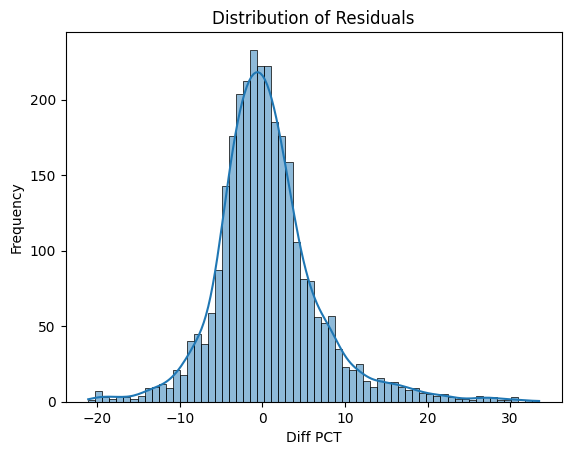

In [ ]:
sns.histplot(results_df['diff_pct'], kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Diff PCT')
plt.ylabel('Frequency')
plt.show()

In [ ]:
extreme_error_threshold = 10  # You can adjust this threshold based on your domain knowledge or requirements
extreme_results_df = results_df[np.abs(results_df['diff_pct']) > extreme_error_threshold]
extreme_results_df.head()

,actual,predicted,diff,diff_pct
3858,6652,7738.957520,1086.957520,16.340311
5063,6191,5353.358398,-837.641602,-13.529989
2837,10959,12518.171875,1559.171875,14.227319
9530,7364,6285.315918,-1078.684082,-14.648073
53,5317,6480.674805,1163.674805,21.885928


In [ ]:
extreme_results_df.shape

(283, 4)

In [ ]:
extreme_errors_pct = extreme_results_df.shape[0]*100/X_test.shape[0]
extreme_errors_pct

9.496644295302014

In [ ]:
X_test.head()

,age,number_of_dependants,income_lakhs,insurance_plan,normalized_risk_score,lifestyle_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
4826,0.333333,0.0,0.333333,0.5,0.428571,0.50,1,0,0,1,1,0,1,0,0,0,1,0
4497,0.129630,0.4,0.181818,0.0,0.000000,1.00,1,0,0,0,1,0,1,0,0,1,1,0
4423,0.518519,0.4,0.303030,1.0,0.428571,0.75,0,1,0,0,0,0,0,0,0,0,0,0
1201,0.148148,0.2,0.303030,0.5,0.428571,0.50,0,0,1,0,1,0,0,0,1,0,0,1
9323,0.462963,0.0,0.272727,0.5,0.428571,0.25,0,0,0,1,1,0,0,0,1,0,0,1


In [ ]:
high_error_records_df = X_test.loc[extreme_results_df.index]
high_error_records_df.head()

,age,number_of_dependants,income_lakhs,insurance_plan,normalized_risk_score,lifestyle_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
3858,0.037037,0.0,0.161616,0.0,0.000000,0.75,0,1,0,0,1,0,0,0,0,0,0,0
5063,0.037037,0.2,0.151515,0.0,0.000000,0.25,0,0,0,1,1,0,0,0,0,0,0,0
2837,0.777778,1.0,0.505051,0.0,0.428571,0.25,0,1,0,0,0,0,0,0,0,0,0,1
9530,0.111111,0.6,0.303030,0.0,0.000000,0.50,1,0,0,1,0,0,0,0,0,0,1,0
53,0.129630,0.2,0.171717,0.0,0.000000,0.50,0,0,1,0,1,0,0,1,0,0,0,0


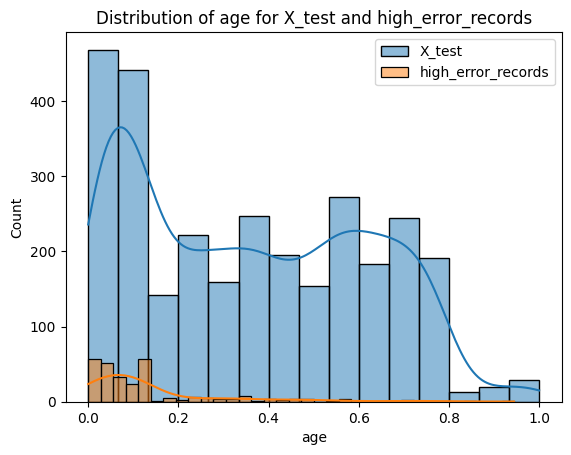

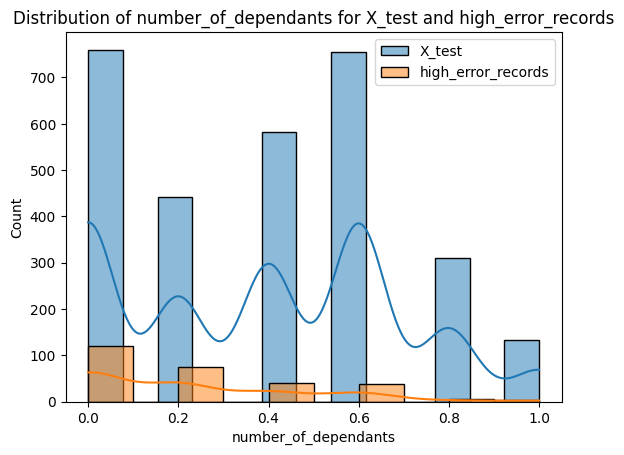

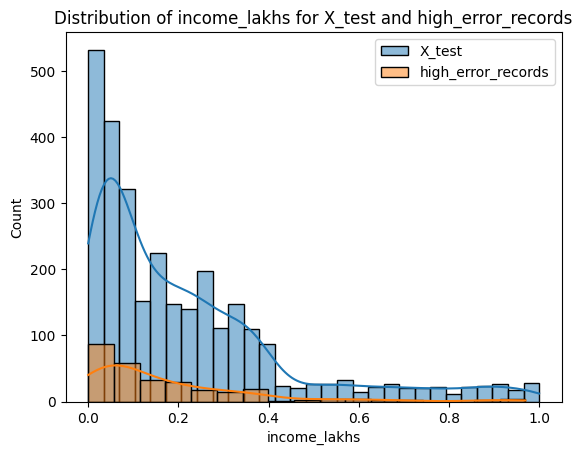

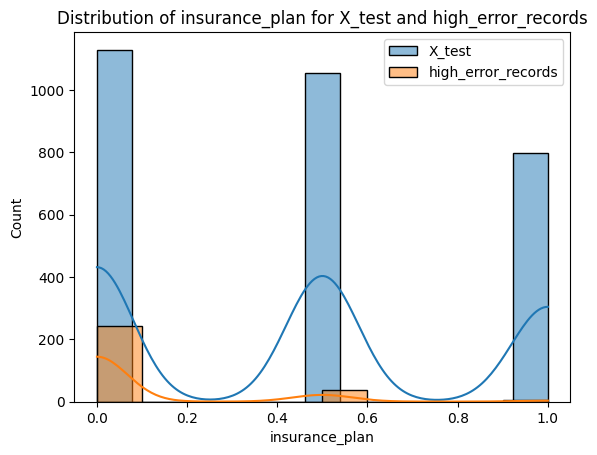

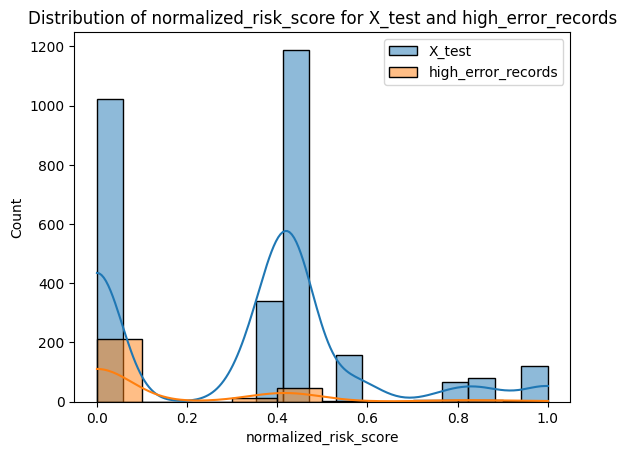

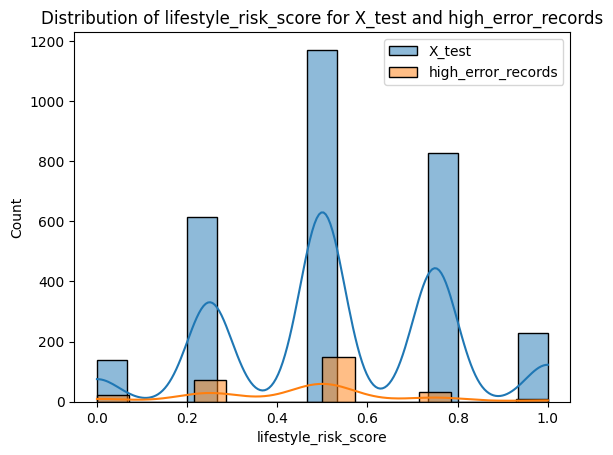

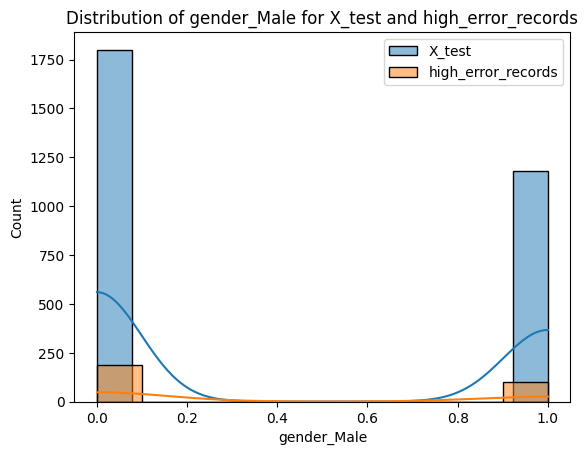

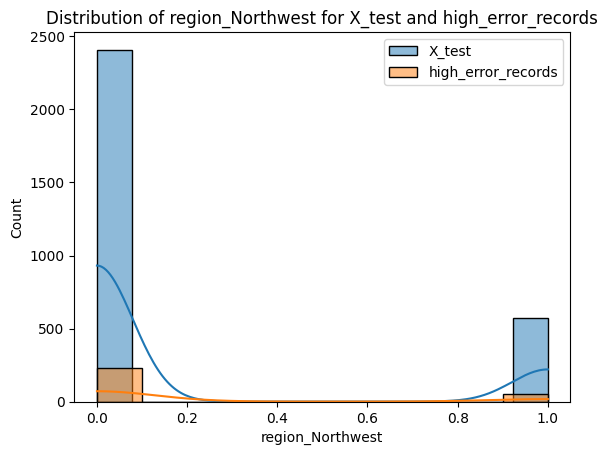

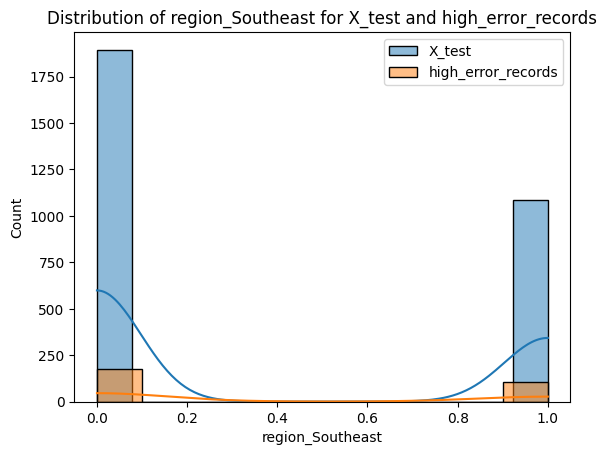

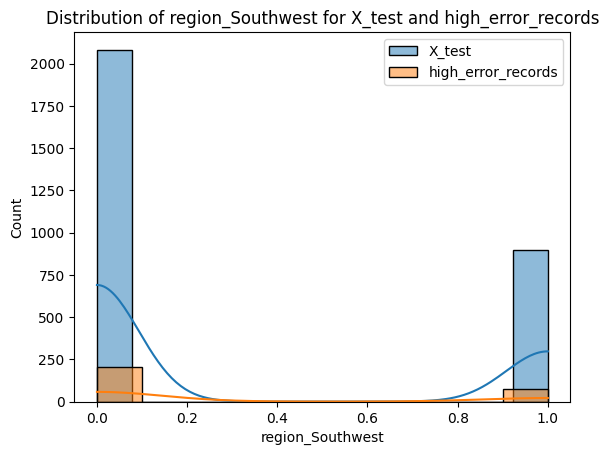

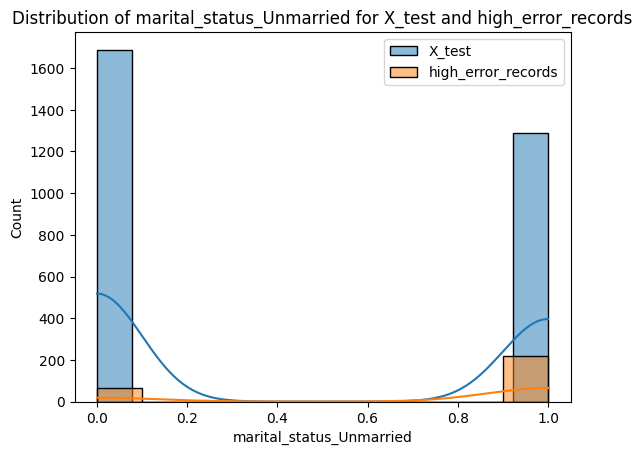

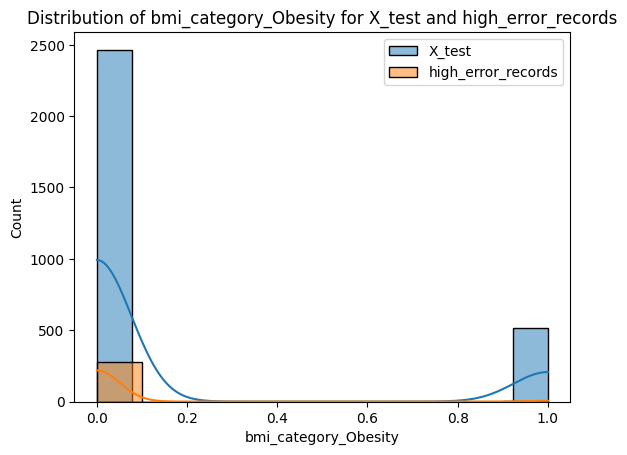

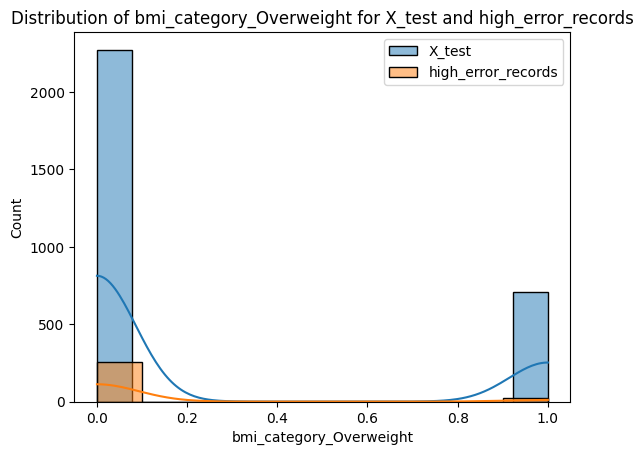

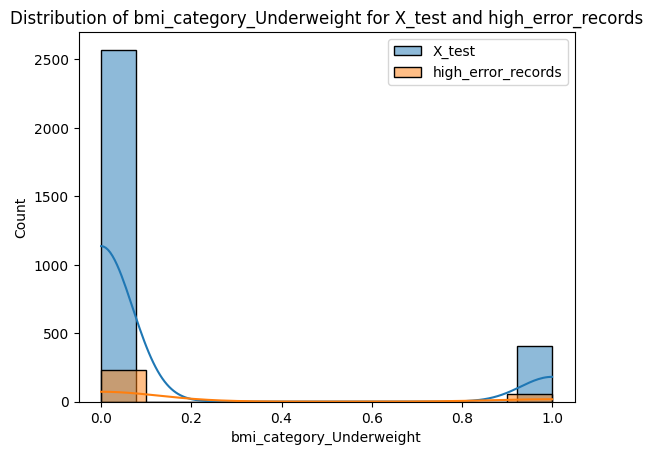

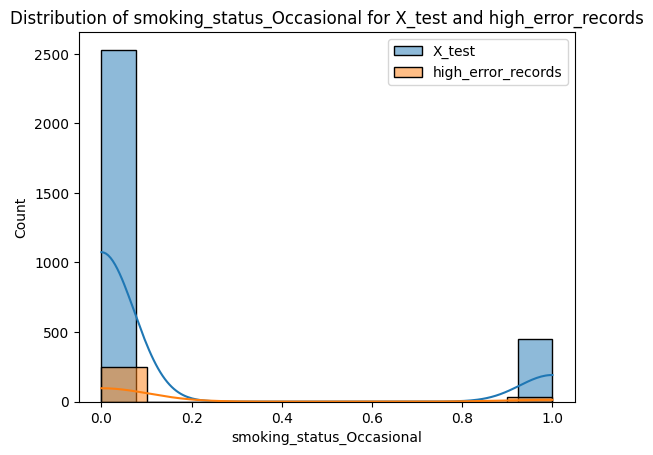

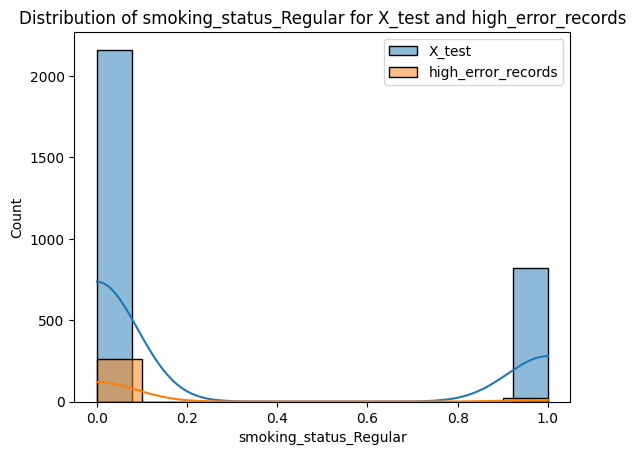

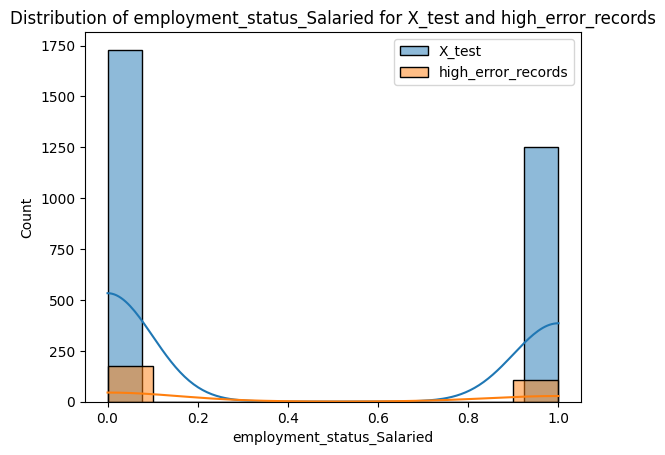

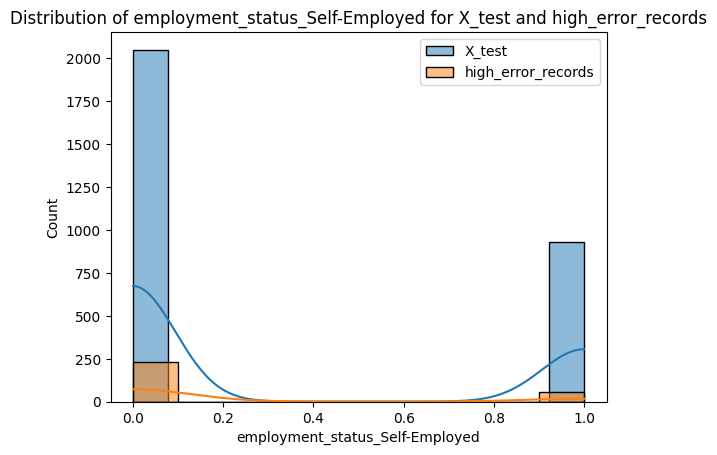

In [ ]:
for feature in X_test.columns:
  sns.histplot(X_test[feature], kde=True, label='X_test')
  sns.histplot(high_error_records_df[feature], kde=True, label='high_error_records')
  plt.legend()
  plt.title(f'Distribution of {feature} for X_test and high_error_records')
  plt.show()

In [ ]:
#Since income_level column is dropped, I have to add that column again (No need to worry about the value.)
high_error_records_df['income_level'] = -1

#Check the age group by reverse scaling
df_reversed = pd.DataFrame()
df_reversed[cols_to_scale] = scaler.inverse_transform(high_error_records_df[cols_to_scale])

In [ ]:
df_reversed

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,lifestyle_risk_score
0,20.0,0.0,-2.0,17.0,1.0,3.0
1,20.0,1.0,-2.0,16.0,1.0,1.0
2,60.0,5.0,-2.0,51.0,1.0,1.0
3,24.0,3.0,-2.0,31.0,1.0,2.0
4,25.0,1.0,-2.0,18.0,1.0,2.0
...,...,...,...,...,...,...
278,23.0,1.0,-2.0,9.0,1.0,2.0
279,23.0,0.0,-2.0,15.0,1.0,1.0
280,20.0,1.0,-2.0,4.0,1.0,3.0
281,38.0,0.0,-2.0,2.0,1.0,2.0


<Axes: xlabel='age', ylabel='Count'>

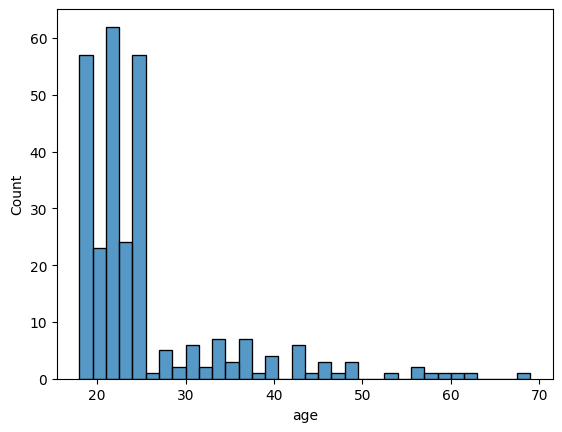

In [ ]:
sns.histplot(df_reversed['age'])

<Axes: xlabel='number_of_dependants', ylabel='Count'>

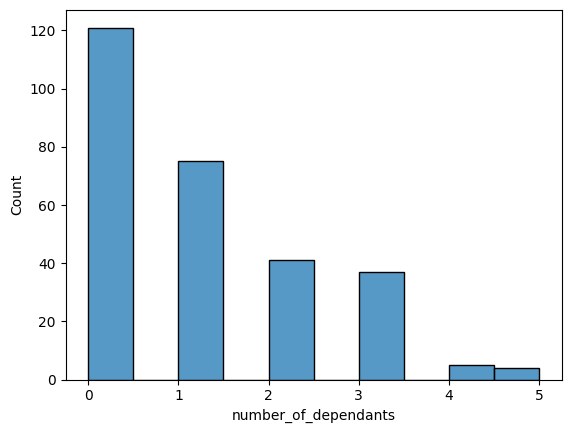

In [ ]:
sns.histplot(df_reversed['number_of_dependants'])

The majority of high error records are concentrated among younger individuals and those with fewer dependents, based on the orange histograms.

In [ ]:
df_reversed.describe()

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,lifestyle_risk_score
count,283.000000,283.000000,283.0,283.000000,283.000000,283.000000
mean,25.296820,1.088339,-2.0,17.957597,1.162544,1.780919
std,8.845616,1.215724,0.0,18.776163,0.414810,0.880073
min,18.000000,0.000000,-2.0,1.000000,1.000000,0.000000
25%,20.000000,0.000000,-2.0,5.000000,1.000000,1.000000
50%,22.000000,1.000000,-2.0,11.000000,1.000000,2.000000
75%,25.000000,2.000000,-2.0,24.000000,1.000000,2.000000
max,69.000000,5.000000,-2.0,97.000000,3.000000,4.000000


In [ ]:
# Calculate the proportion of values where age <= 25
quantile_value = (df_reversed['age'] <= 25).mean()

# Print the quantile value as a percentage
print(f"The quantile corresponding to age <= 25: {quantile_value * 100:.2f}%")

The quantile corresponding to age <= 25: 78.80%


In [ ]:
# Calculate the proportion of values where number_od_dependants <= 1
quantile_value_1 = (df_reversed['number_of_dependants'] <= 1).mean()

print(f"The quantile corresponding to number_of_dependants <= 1: {quantile_value_1 * 100:.2f}%")

The quantile corresponding to number_of_dependants <= 1: 69.26%


Handling high error records is important to improve model performance and reduce prediction inaccuracies. There are several strategies you can adopt depending on the cause of the errors:

1. **Examine the Data for Patterns and Anomalies**
  * Investigate the Features: Review the feature values in high_error_records. Check if there are anomalies, outliers, or feature values that are particularly challenging for the model to predict.
  * Scale or Transform Features: If high error records are associated with specific ranges (e.g., young ages), consider transforming features to make them easier for the model to learn. For example, log transformations or normalization can help when dealing with skewed data.
2. **Increase Model Complexity**
* If the model is too simple, it may not capture the patterns in the data, especially for certain subsets like high_error_records. You can try more complex models:
  * Boosting models (e.g., XGBoost, LightGBM): These models work well on complex data with high variance.
  * Neural Networks: For datasets with non-linear patterns, neural networks can perform better.
  * Hyperparameter Tuning: Tuning the model's parameters can help reduce the error rate.
3. **Use Ensemble Models**
* Combine predictions from multiple models (e.g., stacking, bagging, voting) to reduce overall prediction errors. Ensemble models are robust and can help handle cases where a single model may struggle.
4. **Handle Imbalanced Data**
* If high error records are disproportionately concentrated in certain groups (e.g., very young ages, few dependents), you may have an imbalanced dataset. Handling this involves:
  * Oversampling the minority class (error-prone records): Use techniques like SMOTE (Synthetic Minority Over-sampling Technique) to create synthetic data points for the group where errors are high.
  * Undersampling the majority class: Reduce the size of the majority class to balance the training data.
5. **Regularization to Prevent Overfitting**
* High errors could indicate overfitting on other parts of the data. Regularization techniques like L1 or L2 (Ridge or Lasso) can help smooth the model by reducing overfitting and improving generalization to unseen cases.
6. **Feature Engineering**
 * Create New Features: Based on the errors, identify if new features or transformations might help the model. For example:
 * Polynomial features: For non-linear relationships.
 * Interaction features: Combining features (e.g., age * number of dependents) may reveal hidden patterns.
 * Feature Importance: Check which features are most important and which ones are contributing to high errors. Dropping unimportant or noise features may help.
7. **Adjust the Model's Loss Function**
* Modify the loss function to penalize incorrect predictions in high-error groups more heavily (e.g., weighted loss functions). This will force the model to pay more attention to these cases during training.
8. **Model Interpretability and Explainability**
* Use tools like SHAP or LIME to understand why the model is making errors for certain groups. This can help identify if the model is missing critical relationships or overemphasizing noisy features.
9. **Segmented Model Training**
* Train separate models for different segments of the data. For example, one model could be trained on individuals aged ≤ 25, and another for those aged > 25. This can help capture patterns that are unique to specific segments.
10. **Collect More Data**
* In cases where high error records are related to certain underrepresented groups (e.g., very young ages), collecting more data in those segments can help the model learn better patterns and reduce error rates.


**Summary**

Handling high error records requires a combination of data analysis, model refinement, and potentially transforming your data. By focusing on improving data quality, increasing model complexity, adjusting the loss function, and using feature engineering, you can systematically reduce errors in the problematic groups.